In [ ]:
%pip install sec-api

In [25]:
from sec_api import ExtractorApi # https://pypi.org/project/sec-api/
# get API from sec-api.io
extractorApi = ExtractorApi("e6a91b9f25f7fe10fa59aeee447506d41825fb98675db8ad394177b1c66d6732")


# Apple 10-K filing
filing_url = "https://www.sec.gov/Archives/edgar/data/1559720/000155972025000010/abnb-20241231.htm"


# get the original HTML of section 7A
# "Quantitative and Qualitative Disclosures About Market Risk"
section7A = extractorApi.get_section(filing_url, "7A", "text")


print (section7A)

 Item 7A. Quantitative and Qualitative Disclosures About Market Risk 

Our substantial operations around the world expose us to various market risks. These risks primarily include foreign currency risk and investment risk. 

Foreign Currency Exchange Risk 

We offer the ability to transact on our platform in approximately 50 currencies, of which the most significant foreign currencies to our operations in 2024 were the Euro, British pound, Canadian dollar, Australian dollar, Brazilian real, and Mexican peso. Our international revenue, as well as costs and expenses denominated in foreign currencies, expose us to the risk of fluctuations in foreign currency exchange rates against the U.S. dollar. Accordingly, we are subject to foreign currency risk, which may adversely impact our financial results. 

We have foreign currency exchange risks related primarily to: 

&#8226; revenue and cost of revenue associated with bookings on our platform denominated in currencies other than the U.S. dol

In [ ]:
%pip install wordcloud

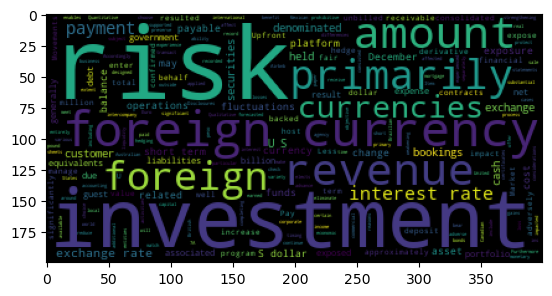

In [26]:
import pandas as pd
import numpy as np

#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

wc = WordCloud().generate(section7A)
plt.imshow(wc)

In [ ]:
%pip install nltk

In [27]:
# import libraries
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# if you don't have vadar_lexicon data, you can run the following command in a terminal window:
#python -m nltk.downloader vader_lexicon
nltk.download('vader_lexicon')

# download nltk corpus (first time only)
nltk.download('all')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\agaebel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\agaebel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\agaebel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\agaebel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\agaebel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is a

True

In [28]:
#Create a Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()
#Analyze section_text
scores = analyzer.polarity_scores(section7A)

print(scores)
#the compound key is a normalized score that ranges from -1(most negative) to 1(most positive)

{'neg': 0.087, 'neu': 0.807, 'pos': 0.107, 'compound': 0.9845}


In [29]:
#We can also check which score is the highest and use that to classify the text as positive, negative, or neutral.
if scores['compound'] >= 0.5:
    print("Positive")
elif scores['compound'] >-0.5:
    print("Neutral")
else:
    print("Negative")

Positive


In [ ]:
%pip install transformers

# FinBERT

In [30]:
import requests
from sec_api import ExtractorApi
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import Counter

# Initialize sec-api with your API key
extractorApi = ExtractorApi("e6a91b9f25f7fe10fa59aeee447506d41825fb98675db8ad394177b1c66d6732")  # Replace with your actual API key

# URL of the 10-K filing
filing_url = "https://www.sec.gov/Archives/edgar/data/1559720/000155972025000010/abnb-20241231.htm"


# Extract Section 7A "Quantitative and Qualitative Disclosures About Market Risk"
section_text = extractorApi.get_section(filing_url, "7A", "text")
print(section_text)

 Item 7A. Quantitative and Qualitative Disclosures About Market Risk 

Our substantial operations around the world expose us to various market risks. These risks primarily include foreign currency risk and investment risk. 

Foreign Currency Exchange Risk 

We offer the ability to transact on our platform in approximately 50 currencies, of which the most significant foreign currencies to our operations in 2024 were the Euro, British pound, Canadian dollar, Australian dollar, Brazilian real, and Mexican peso. Our international revenue, as well as costs and expenses denominated in foreign currencies, expose us to the risk of fluctuations in foreign currency exchange rates against the U.S. dollar. Accordingly, we are subject to foreign currency risk, which may adversely impact our financial results. 

We have foreign currency exchange risks related primarily to: 

&#8226; revenue and cost of revenue associated with bookings on our platform denominated in currencies other than the U.S. dol

In [ ]:
%pip install tensorflow
%pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Traceback (most recent call last):
        File "C:\Users\ADMIN\anaconda3\Lib\site-packages\packaging\requirements.py", line 36, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\ADMIN\anaconda3\Lib\site-packages\packaging\_parser.py", line 62, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\ADMIN\anaconda3\Lib\site-packages\packaging\_parser.py", line 80, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\ADMIN\anaconda3\Lib\site-packages\packaging\_parser.py"

Device set to use cpu


Sentiment Distribution: {'neutral': 71.43, 'negative': 21.43, 'positive': 7.14}


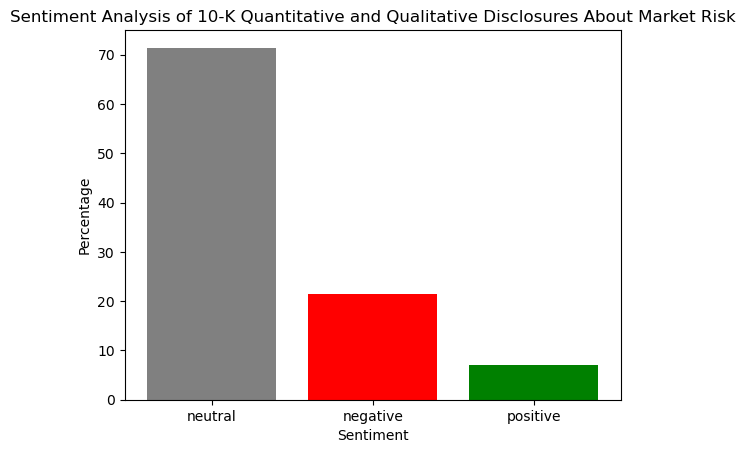

In [31]:
if section_text:
    # Load FinBERT model
    finbert = pipeline("text-classification", model="ProsusAI/finbert")

    # Split text into chunks (FinBERT has a 512-token limit)
    sentences = section_text.split(". ")
    chunk = ""
    sentiment_results = []

    for sentence in sentences:
        if len(chunk) + len(sentence) < 512:
            chunk += sentence + ". "
        else:
            sentiment_results.extend(finbert(chunk[:512]))  # Process chunk
            chunk = sentence + ". "

    # Process the last chunk if any
    if chunk:
        sentiment_results.extend(finbert(chunk[:512]))

    # Aggregate Sentiments
    labels = [res['label'] for res in sentiment_results]
    count = Counter(labels)
    total = len(sentiment_results)
    percentage = {label: round((count[label] / total) * 100, 2) for label in count}

    # Print sentiment distribution
    print("Sentiment Distribution:", percentage)

    # Plot sentiment results
    plt.bar(percentage.keys(), percentage.values(), color=['gray', 'red', 'green'])
    plt.xlabel("Sentiment")
    plt.ylabel("Percentage")
    plt.title("Sentiment Analysis of 10-K Quantitative and Qualitative Disclosures About Market Risk")
    plt.show()

else:
    print("Section 7A not found.")

# FinBERT Airbnb 2024

In [32]:
import requests
from sec_api import ExtractorApi
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import Counter

# Initialize sec-api with your API key
extractorApi = ExtractorApi("e6a91b9f25f7fe10fa59aeee447506d41825fb98675db8ad394177b1c66d6732")  # Replace with your actual API key

# URL of the 10-K filing
filing_url = "https://www.sec.gov/Archives/edgar/data/1559720/000155972025000010/abnb-20241231.htm"


# Extract Section 7A "Quantitative and Qualitative Disclosures About Market Risk"
section_text = extractorApi.get_section(filing_url, "7A", "text")
print(section_text)

 Item 7A. Quantitative and Qualitative Disclosures About Market Risk 

Our substantial operations around the world expose us to various market risks. These risks primarily include foreign currency risk and investment risk. 

Foreign Currency Exchange Risk 

We offer the ability to transact on our platform in approximately 50 currencies, of which the most significant foreign currencies to our operations in 2024 were the Euro, British pound, Canadian dollar, Australian dollar, Brazilian real, and Mexican peso. Our international revenue, as well as costs and expenses denominated in foreign currencies, expose us to the risk of fluctuations in foreign currency exchange rates against the U.S. dollar. Accordingly, we are subject to foreign currency risk, which may adversely impact our financial results. 

We have foreign currency exchange risks related primarily to: 

&#8226; revenue and cost of revenue associated with bookings on our platform denominated in currencies other than the U.S. dol

Device set to use cpu


Sentiment Distribution: {'neutral': 71.43, 'negative': 21.43, 'positive': 7.14}


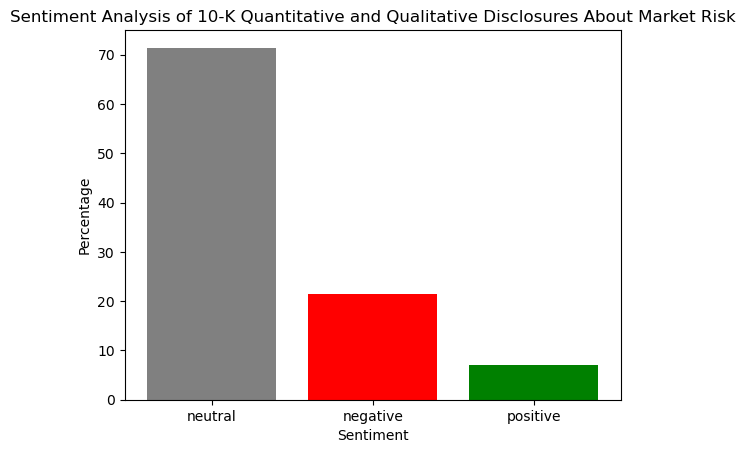

In [33]:
if section_text:
    # Load FinBERT model
    finbert = pipeline("text-classification", model="ProsusAI/finbert")

    # Split text into chunks (FinBERT has a 512-token limit)
    sentences = section_text.split(". ")
    chunk = ""
    sentiment_results = []

    for sentence in sentences:
        if len(chunk) + len(sentence) < 512:
            chunk += sentence + ". "
        else:
            sentiment_results.extend(finbert(chunk[:512]))  # Process chunk
            chunk = sentence + ". "

    # Process the last chunk if any
    if chunk:
        sentiment_results.extend(finbert(chunk[:512]))

    # Aggregate Sentiments
    labels = [res['label'] for res in sentiment_results]
    count = Counter(labels)
    total = len(sentiment_results)
    percentage = {label: round((count[label] / total) * 100, 2) for label in count}

    # Print sentiment distribution
    print("Sentiment Distribution:", percentage)

    # Plot sentiment results
    plt.bar(percentage.keys(), percentage.values(), color=['gray', 'red', 'green'])
    plt.xlabel("Sentiment")
    plt.ylabel("Percentage")
    plt.title("Sentiment Analysis of 10-K Quantitative and Qualitative Disclosures About Market Risk")
    plt.show()

else:
    print("Section 7A not found.")

# FinBERT Airbnb 2023

In [34]:
import requests
from sec_api import ExtractorApi
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import Counter

# Initialize sec-api with your API key
extractorApi = ExtractorApi("e6a91b9f25f7fe10fa59aeee447506d41825fb98675db8ad394177b1c66d6732")  # Replace with your actual API key

# URL of the 10-K filing
filing_url = "https://www.sec.gov/Archives/edgar/data/1559720/000155972024000006/abnb-20231231.htm"


# Extract Section 7A "Quantitative and Qualitative Disclosures About Market Risk"
section_text = extractorApi.get_section(filing_url, "7A", "text")
print(section_text)

 Item 7A. Quantitative and Qualitative Disclosures About Market Risk 

Our substantial operations around the world expose us to various market risks. These risks primarily include foreign currency risk and investment risk. 

Foreign Currency Exchange Risk 

We offer the ability to transact on our platform in over 40 currencies, of which the most significant foreign currencies to our operations in 2023 were the Euro, British Pound, Canadian Dollar, Australian Dollar, Brazilian Real, and Mexican Peso. Our international revenue, as well as costs and expenses denominated in foreign currencies, expose us to the risk of fluctuations in foreign currency exchange rates against the U.S. dollar. Accordingly, we are subject to foreign currency risk, which may adversely impact our financial results. 

We have foreign currency exchange risks related primarily to: 

&#8226; revenue and cost of revenue associated with bookings on our platform denominated in currencies other than the U.S. dollar; 

&#

Device set to use cpu


Sentiment Distribution: {'neutral': 69.23, 'negative': 23.08, 'positive': 7.69}


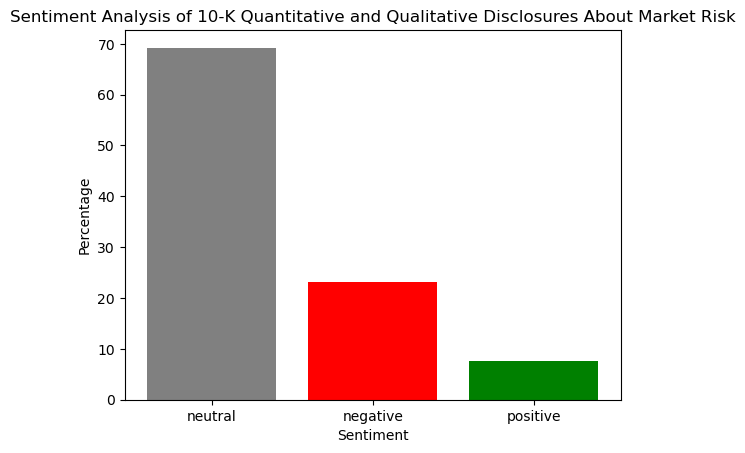

In [35]:
if section_text:
    # Load FinBERT model
    finbert = pipeline("text-classification", model="ProsusAI/finbert")

    # Split text into chunks (FinBERT has a 512-token limit)
    sentences = section_text.split(". ")
    chunk = ""
    sentiment_results = []

    for sentence in sentences:
        if len(chunk) + len(sentence) < 512:
            chunk += sentence + ". "
        else:
            sentiment_results.extend(finbert(chunk[:512]))  # Process chunk
            chunk = sentence + ". "

    # Process the last chunk if any
    if chunk:
        sentiment_results.extend(finbert(chunk[:512]))

    # Aggregate Sentiments
    labels = [res['label'] for res in sentiment_results]
    count = Counter(labels)
    total = len(sentiment_results)
    percentage = {label: round((count[label] / total) * 100, 2) for label in count}

    # Print sentiment distribution
    print("Sentiment Distribution:", percentage)

    # Plot sentiment results
    plt.bar(percentage.keys(), percentage.values(), color=['gray', 'red', 'green'])
    plt.xlabel("Sentiment")
    plt.ylabel("Percentage")
    plt.title("Sentiment Analysis of 10-K Quantitative and Qualitative Disclosures About Market Risk")
    plt.show()

else:
    print("Section 7A not found.")

# FinBERT Airbnb 2022

In [36]:
import requests
from sec_api import ExtractorApi
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import Counter

# Initialize sec-api with your API key
extractorApi = ExtractorApi("e6a91b9f25f7fe10fa59aeee447506d41825fb98675db8ad394177b1c66d6732")  # Replace with your actual API key

# URL of the 10-K filing
filing_url = "https://www.sec.gov/Archives/edgar/data/1559720/000155972023000003/abnb-20221231.htm"


# Extract Section 7A "Quantitative and Qualitative Disclosures About Market Risk"
section_text = extractorApi.get_section(filing_url, "7A", "text")
print(section_text)

 Item 7A. Quantitative and Qualitative Disclosures About Market Risk 

Our substantial operations around the world expose us to various market risks. These risks primarily include foreign currency risk and investment risk. 

Foreign Currency Exchange Risk 

We offer the ability to transact on our platform in over 40 currencies, of which the most significant foreign currencies to our operations in 2022 were the Euro, British Pound, Canadian Dollar, Australian Dollar, Brazilian Real, and Mexican Peso. Our international revenue, as well as costs and expenses denominated in foreign currencies, expose us to the risk of fluctuations in foreign currency exchange rates against the U.S. dollar. Accordingly, we are subject to foreign currency risk, which may adversely impact our financial results. 

We have foreign currency exchange risks related primarily to: 

&#8226; revenue and cost of revenue associated with bookings on our platform denominated in currencies other than the U.S. dollar; 

&#

Device set to use cpu


Sentiment Distribution: {'neutral': 75.0, 'negative': 25.0}


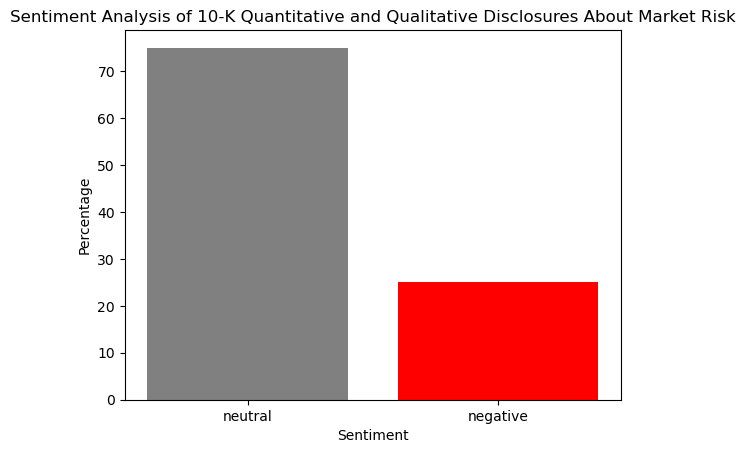

In [37]:
if section_text:
    # Load FinBERT model
    finbert = pipeline("text-classification", model="ProsusAI/finbert")

    # Split text into chunks (FinBERT has a 512-token limit)
    sentences = section_text.split(". ")
    chunk = ""
    sentiment_results = []

    for sentence in sentences:
        if len(chunk) + len(sentence) < 512:
            chunk += sentence + ". "
        else:
            sentiment_results.extend(finbert(chunk[:512]))  # Process chunk
            chunk = sentence + ". "

    # Process the last chunk if any
    if chunk:
        sentiment_results.extend(finbert(chunk[:512]))

    # Aggregate Sentiments
    labels = [res['label'] for res in sentiment_results]
    count = Counter(labels)
    total = len(sentiment_results)
    percentage = {label: round((count[label] / total) * 100, 2) for label in count}

    # Print sentiment distribution
    print("Sentiment Distribution:", percentage)

    # Plot sentiment results
    plt.bar(percentage.keys(), percentage.values(), color=['gray', 'red', 'green'])
    plt.xlabel("Sentiment")
    plt.ylabel("Percentage")
    plt.title("Sentiment Analysis of 10-K Quantitative and Qualitative Disclosures About Market Risk")
    plt.show()

else:
    print("Section 7A not found.")

# FinBERT Airbnb 2021

In [38]:
import requests
from sec_api import ExtractorApi
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import Counter

# Initialize sec-api with your API key
extractorApi = ExtractorApi("e6a91b9f25f7fe10fa59aeee447506d41825fb98675db8ad394177b1c66d6732")  # Replace with your actual API key

# URL of the 10-K filing
filing_url = "https://www.sec.gov/Archives/edgar/data/1559720/000155972022000006/abnb-20211231.htm"


# Extract Section 7A "Quantitative and Qualitative Disclosures About Market Risk"
section_text = extractorApi.get_section(filing_url, "7A", "text")
print(section_text)

 Item 7A. Quantitative and Qualitative Disclosures About Market Risk 

Our substantial operations around the world expose us to various market risks. These risks primarily include foreign currency risk and investment risk. 

Foreign Currency Exchange Risk 

We offer the ability to transact on our platform in over 40 currencies, of which the most significant foreign currencies to our operations in 2021 were the Euro, British Pound, Australian Dollar, Canadian Dollar, Brazilian Real, and Mexican Peso. Our international revenue, as well as costs and expenses denominated in foreign currencies, expose us to the risk of fluctuations in foreign currency exchange rates against the U.S. dollar. Accordingly, we are subject to foreign currency risk, which may adversely impact our financial results. 

We have foreign currency exchange risks related primarily to: 

&#8226; revenue and cost of revenue associated with bookings on our platform denominated in currencies other than the U.S. dollar; 

&#

Device set to use cpu


Sentiment Distribution: {'neutral': 75.0, 'negative': 8.33, 'positive': 16.67}


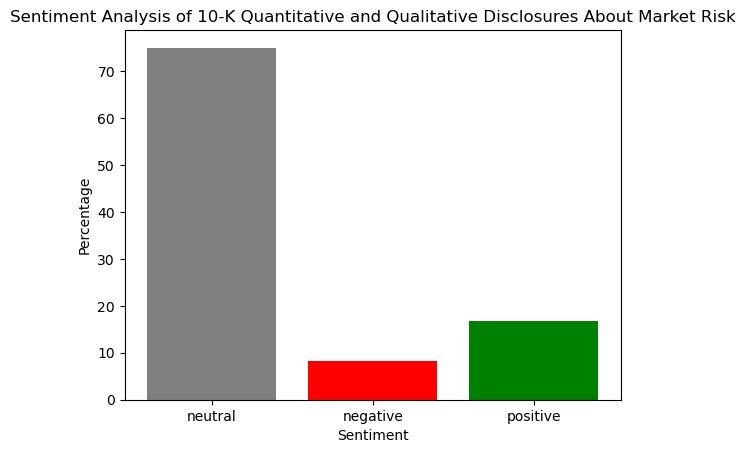

In [39]:
if section_text:
    # Load FinBERT model
    finbert = pipeline("text-classification", model="ProsusAI/finbert")

    # Split text into chunks (FinBERT has a 512-token limit)
    sentences = section_text.split(". ")
    chunk = ""
    sentiment_results = []

    for sentence in sentences:
        if len(chunk) + len(sentence) < 512:
            chunk += sentence + ". "
        else:
            sentiment_results.extend(finbert(chunk[:512]))  # Process chunk
            chunk = sentence + ". "

    # Process the last chunk if any
    if chunk:
        sentiment_results.extend(finbert(chunk[:512]))

    # Aggregate Sentiments
    labels = [res['label'] for res in sentiment_results]
    count = Counter(labels)
    total = len(sentiment_results)
    percentage = {label: round((count[label] / total) * 100, 2) for label in count}

    # Print sentiment distribution
    print("Sentiment Distribution:", percentage)

    # Plot sentiment results
    plt.bar(percentage.keys(), percentage.values(), color=['gray', 'red', 'green'])
    plt.xlabel("Sentiment")
    plt.ylabel("Percentage")
    plt.title("Sentiment Analysis of 10-K Quantitative and Qualitative Disclosures About Market Risk")
    plt.show()

else:
    print("Section 7A not found.")

# FinBERT Airbnb 2020

In [40]:
import requests
from sec_api import ExtractorApi
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import Counter

# Initialize sec-api with your API key
extractorApi = ExtractorApi("e6a91b9f25f7fe10fa59aeee447506d41825fb98675db8ad394177b1c66d6732")  # Replace with your actual API key

# URL of the 10-K filing
filing_url = "https://www.sec.gov/Archives/edgar/data/1559720/000155972021000010/airbnb-10k.htm"


# Extract Section 7A "Quantitative and Qualitative Disclosures About Market Risk"
section_text = extractorApi.get_section(filing_url, "7A", "text")
print(section_text)

 Item 7A. Quantitative and Qualitative Disclosures About Market Risk 

Our substantial operations around the world expose us to various market risks. These risks primarily include foreign currency risk and investment risk. 

Foreign Currency Exchange Risk 

We offer the ability to transact on our platform in over 40 currencies, of which the most significant foreign currencies to our operations in 2020 were the Euro, British Pound, Australian Dollar, Canadian Dollar, Brazilian Real, and Chinese Yuan. Our international revenue, as well as costs and expenses denominated in foreign currencies, expose us to the risk of fluctuations in foreign currency exchange rates against the U.S. dollar. Accordingly, we are subject to foreign currency risk, which may adversely impact our financial results. 

We have foreign currency exchange risks related primarily to&#58; 

&#8226; revenue and cost of revenue associated with bookings on our platform denominated in currencies other than the U.S. dollar&#

Device set to use cpu


Sentiment Distribution: {'neutral': 85.71, 'negative': 7.14, 'positive': 7.14}


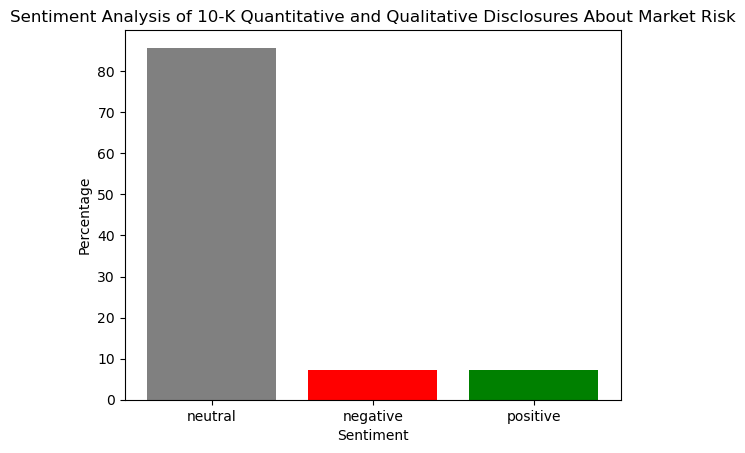

In [41]:
if section_text:
    # Load FinBERT model
    finbert = pipeline("text-classification", model="ProsusAI/finbert")

    # Split text into chunks (FinBERT has a 512-token limit)
    sentences = section_text.split(". ")
    chunk = ""
    sentiment_results = []

    for sentence in sentences:
        if len(chunk) + len(sentence) < 512:
            chunk += sentence + ". "
        else:
            sentiment_results.extend(finbert(chunk[:512]))  # Process chunk
            chunk = sentence + ". "

    # Process the last chunk if any
    if chunk:
        sentiment_results.extend(finbert(chunk[:512]))

    # Aggregate Sentiments
    labels = [res['label'] for res in sentiment_results]
    count = Counter(labels)
    total = len(sentiment_results)
    percentage = {label: round((count[label] / total) * 100, 2) for label in count}

    # Print sentiment distribution
    print("Sentiment Distribution:", percentage)

    # Plot sentiment results
    plt.bar(percentage.keys(), percentage.values(), color=['gray', 'red', 'green'])
    plt.xlabel("Sentiment")
    plt.ylabel("Percentage")
    plt.title("Sentiment Analysis of 10-K Quantitative and Qualitative Disclosures About Market Risk")
    plt.show()

else:
    print("Section 7A not found.")

In [ ]:
if section_text:
    # Load FinBERT model
    finbert = pipeline("text-classification", model="ProsusAI/finbert")

    # Split text into chunks (FinBERT has a 512-token limit)
    sentences = section_text.split(". ")
    chunk = ""
    sentiment_results = []

    for sentence in sentences:
        if len(chunk) + len(sentence) < 512:
            chunk += sentence + ". "
        else:
            sentiment_results.extend(finbert(chunk[:512]))  # Process chunk
            chunk = sentence + ". "

    # Process the last chunk if any
    if chunk:
        sentiment_results.extend(finbert(chunk[:512]))

    # Aggregate Sentiments
    labels = [res['label'] for res in sentiment_results]
    count = Counter(labels)
    total = len(sentiment_results)
    percentage = {label: round((count[label] / total) * 100, 2) for label in count}

    # Print sentiment distribution
    print("Sentiment Distribution:", percentage)

    # Plot sentiment results
    plt.bar(percentage.keys(), percentage.values(), color=['gray', 'red', 'green'])
    plt.xlabel("Sentiment")
    plt.ylabel("Percentage")
    plt.title("Sentiment Analysis of 10-K Risk Factors")
    plt.show()

else:
    print("Section 7 not found.")

NameError: name 'init_empty_weights' is not defined